## **0- Importation des librairies**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel



In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# **1 - chargement du dataset**

In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **2 - Exploration des données**

### **2.1 - Structure des données**

In [4]:
print("Number of columns and rows in dataset:")
num_rows, num_cols = data.shape
print(f"\tNumber of rows: {num_rows}")
print(f"\tNumber of columns: {num_cols}\n")

Number of columns and rows in dataset:
	Number of rows: 569
	Number of columns: 33



**La data contient 569 lignes et 33 colonnes**

### 2.2 - Affichage de la plage des valeurs pour chaque colonne

In [5]:
range_values = data.describe().loc[['min', 'max']]
print(range_values)

              id  radius_mean  texture_mean  perimeter_mean  area_mean  \
min       8670.0        6.981          9.71           43.79      143.5   
max  911320502.0       28.110         39.28          188.50     2501.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
min          0.05263           0.01938          0.0000               0.0000   
max          0.16340           0.34540          0.4268               0.2012   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
min          0.106                 0.04996     0.1115      0.3602   
max          0.304                 0.09744     2.8730      4.8850   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
min         0.757    6.802       0.001713        0.002252         0.000   
max        21.980  542.200       0.031130        0.135400         0.396   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
min            0.00000     0.0

**la colonne Unamed: 32 ne contient pas de valeurs**

In [6]:
print("Name of the columns")
cols_names = data.columns
print(f"\tName of columns:\n {cols_names}\n")

Name of the columns
	Name of columns:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')



### **2.3 - Affichage des types des colonnes**

In [7]:
print("Type of the columns")
print(f'\t {data.dtypes.to_string()}')

Type of the columns
	 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float6

### **2.4 - Affichage du nombre de personnes qui ont M et B dans diagnosis**

In [8]:
print("Count Malignant & Benign rows:")
diagnosis_counts = data["diagnosis"].value_counts()
count_malignant = diagnosis_counts.get('M')
count_benign = diagnosis_counts.get('B')
print(f"\tNumber of 'M' (malignant) diagnoses: {count_malignant}")
print(f"\tNumber of 'B' (benign) diagnoses: {count_benign}")

Count Malignant & Benign rows:
	Number of 'M' (malignant) diagnoses: 212
	Number of 'B' (benign) diagnoses: 357


### 2.5 - **Affichage des valeurs nulles**

In [9]:
nan_counts = data.isna().sum()
print("NaN Value Counts in Columns:")
print(nan_counts)

NaN Value Counts in Columns:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

# 3 - Pré-traitement de données

### **3.1 - Suppression des colonnes Unnamed et id**

**Puisque les colonnes Unnamed ne vont pas nous servir par la suite, on procède à leur suppression**

In [10]:
data =  data.drop('Unnamed: 32',axis=1)
data =  data.drop('id',axis=1)

In [11]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **4 - Statistique descriptive**

In [12]:
print("--------Descriptive statistics------")
columns_to_exclude = ['diagnosis']
data_excluded = data.drop(columns=columns_to_exclude)
float_summary = data_excluded.describe(include='float')
print(float_summary)

--------Descriptive statistics------
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000

**Par la suite on affiche les outliers des colonnes**

In [13]:
print("Distribution - Normal law:")
mean_value = data_excluded.mean()
std_dev = data_excluded.std()


for column in data_excluded.columns:
    mean_value = data_excluded[column].mean()
    std_dev = data_excluded[column].std()

    within_one_std = len(data_excluded[(data_excluded[column] >= mean_value - std_dev) & (data_excluded[column] <= mean_value + std_dev)]) / len(data_excluded) * 100
    within_two_std = len(data_excluded[(data_excluded[column] >= mean_value - 2 * std_dev) & (data_excluded[column] <= mean_value + 2 * std_dev)]) / len(data_excluded) * 100
    within_three_std = len(data_excluded[(data_excluded[column] >= mean_value - 3 * std_dev) & (data_excluded[column] <= mean_value + 3 * std_dev)]) / len(data_excluded) * 100

    print(f"Column: {column}")
    print(f"Percentage within 1 STD: {within_one_std:.2f}%")
    print(f"Percentage within 2 STD: {within_two_std:.2f}%")
    print(f"Percentage within 3 STD: {within_three_std:.2f}%")
    print()

Distribution - Normal law:
Column: radius_mean
Percentage within 1 STD: 70.12%
Percentage within 2 STD: 96.49%
Percentage within 3 STD: 99.12%

Column: texture_mean
Percentage within 1 STD: 68.54%
Percentage within 2 STD: 95.61%
Percentage within 3 STD: 99.30%

Column: perimeter_mean
Percentage within 1 STD: 70.83%
Percentage within 2 STD: 96.13%
Percentage within 3 STD: 98.77%

Column: area_mean
Percentage within 1 STD: 75.92%
Percentage within 2 STD: 95.96%
Percentage within 3 STD: 98.59%

Column: smoothness_mean
Percentage within 1 STD: 69.60%
Percentage within 2 STD: 96.49%
Percentage within 3 STD: 99.12%

Column: compactness_mean
Percentage within 1 STD: 73.29%
Percentage within 2 STD: 95.08%
Percentage within 3 STD: 98.42%

Column: concavity_mean
Percentage within 1 STD: 77.33%
Percentage within 2 STD: 95.43%
Percentage within 3 STD: 98.42%

Column: concave points_mean
Percentage within 1 STD: 73.99%
Percentage within 2 STD: 95.25%
Percentage within 3 STD: 98.95%

Column: symmetr

### **Affichage des outliers**

Outliers


/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/3141856636.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be

'Done'

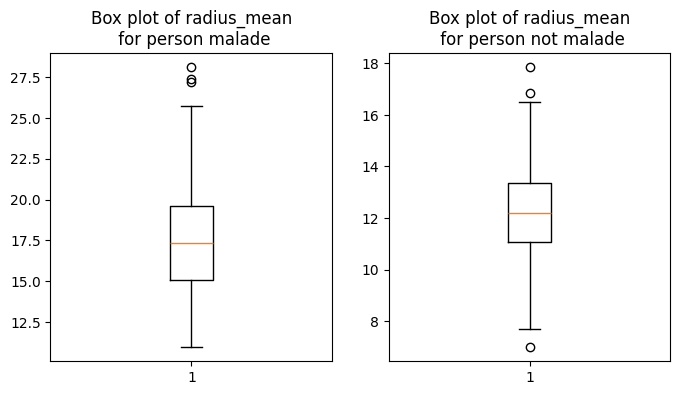

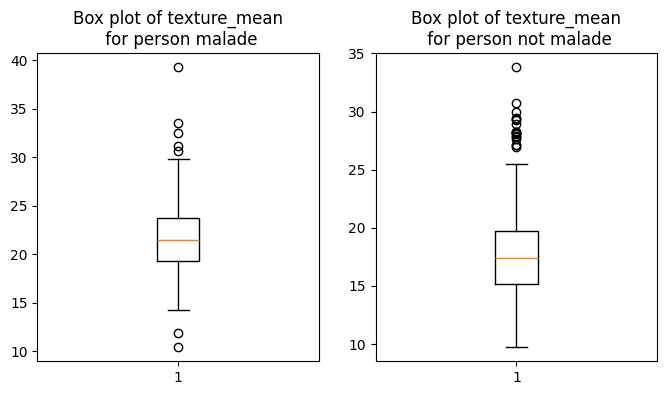

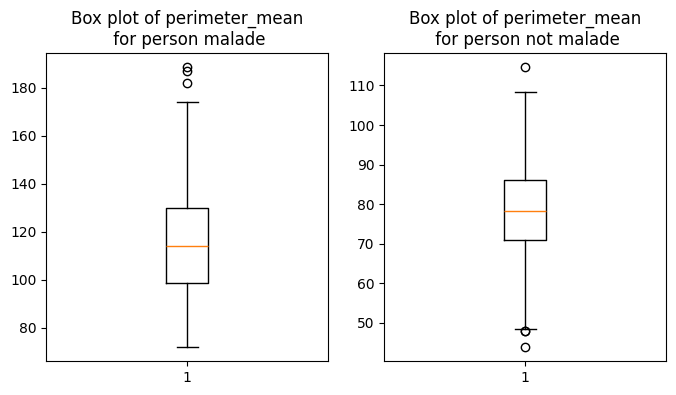

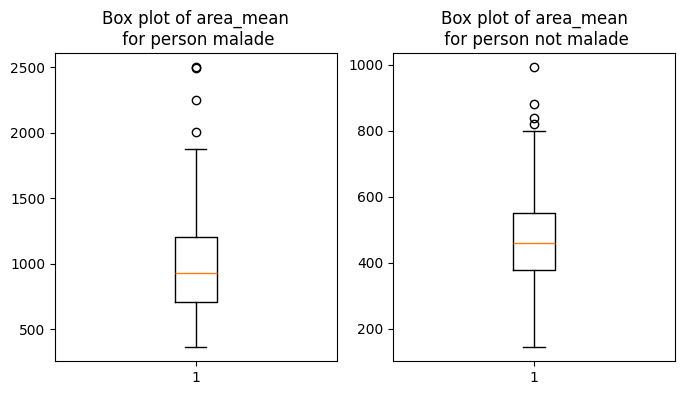

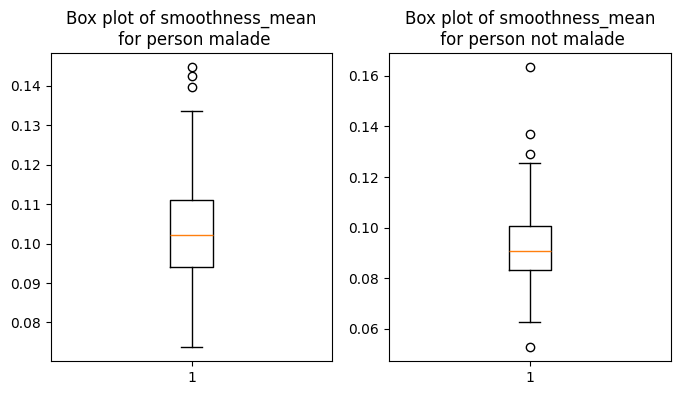

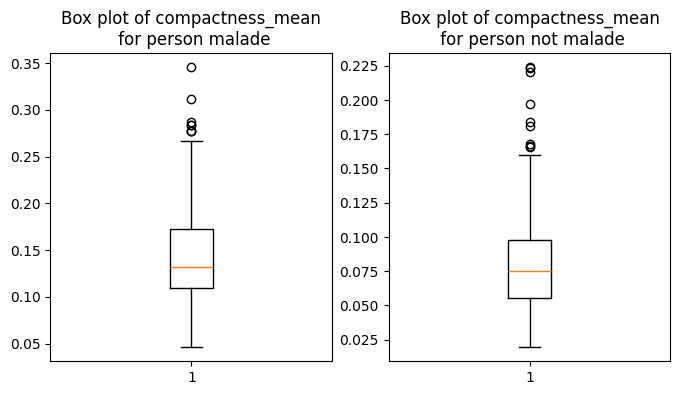

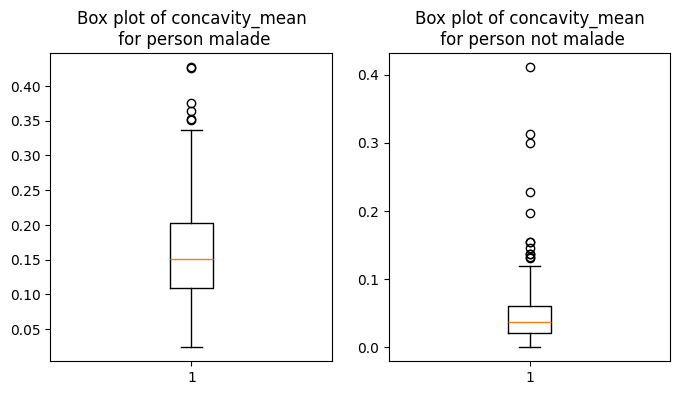

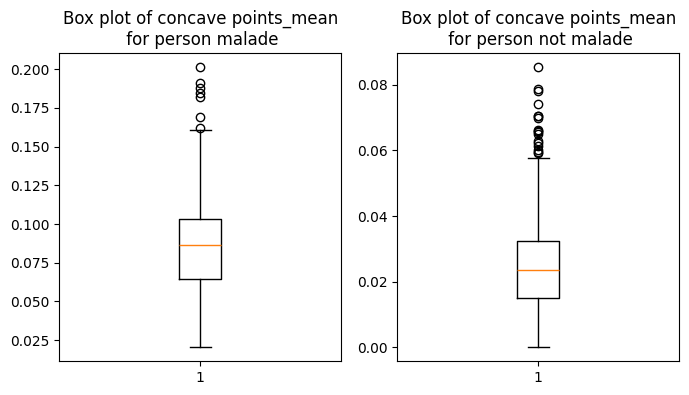

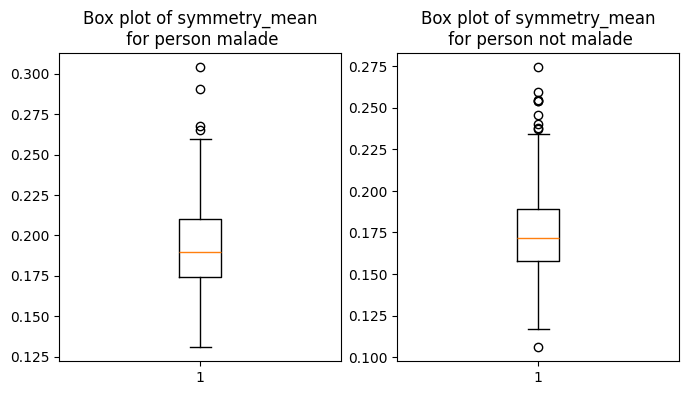

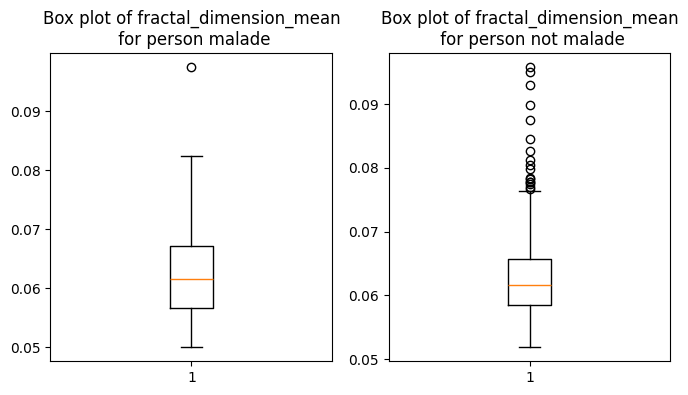

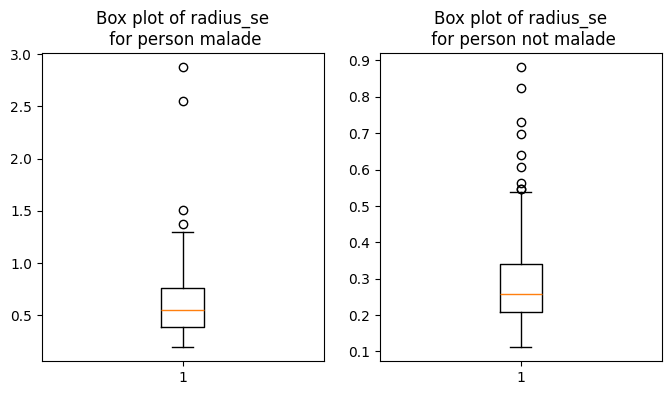

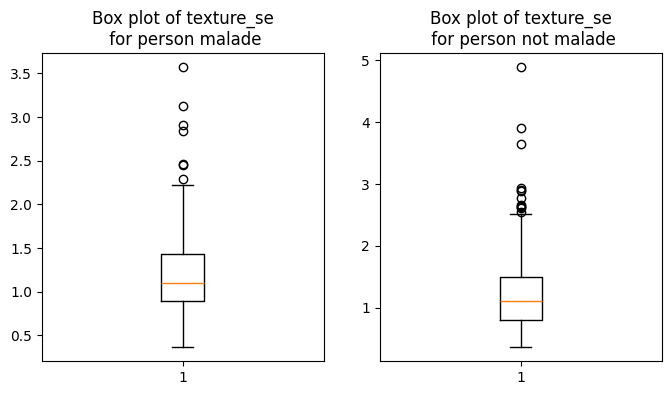

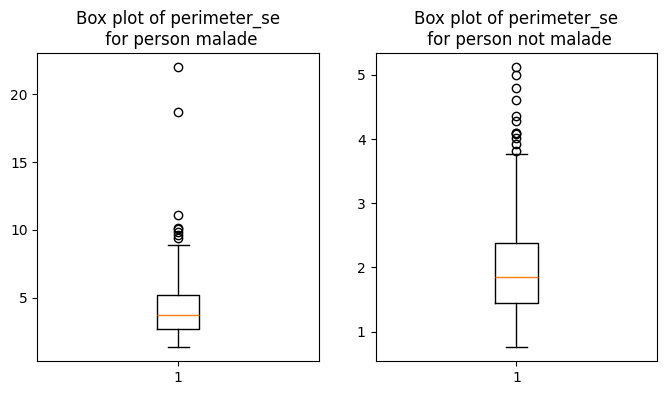

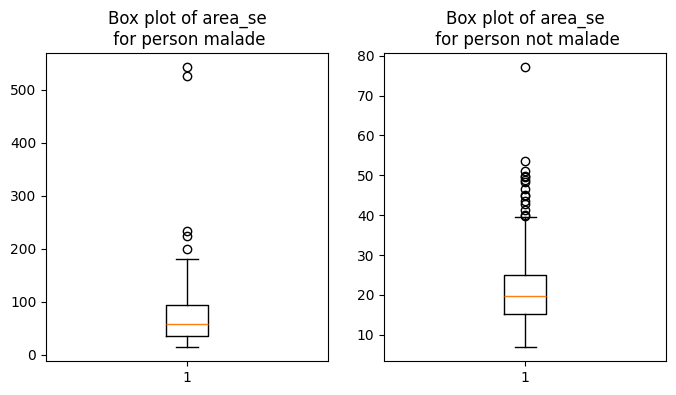

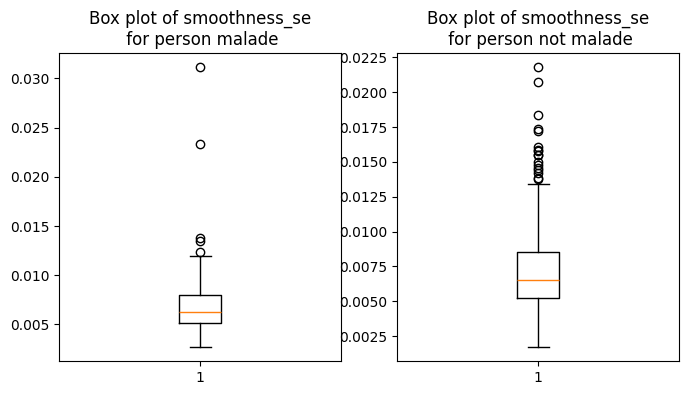

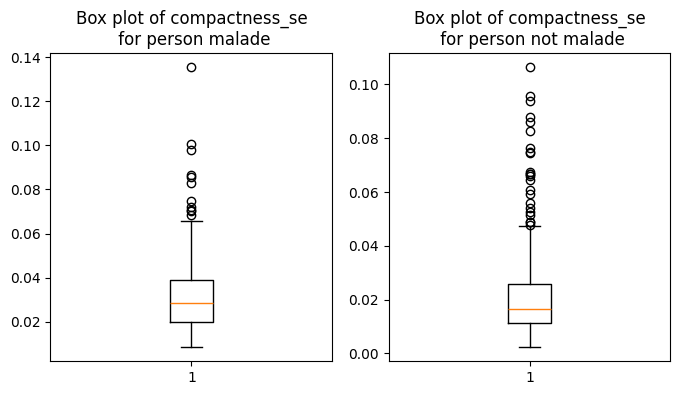

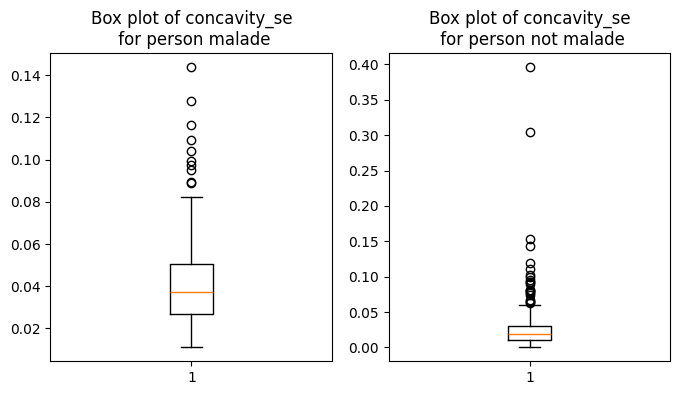

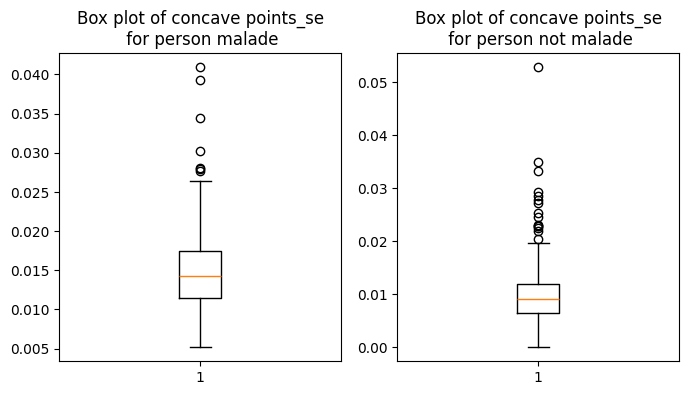

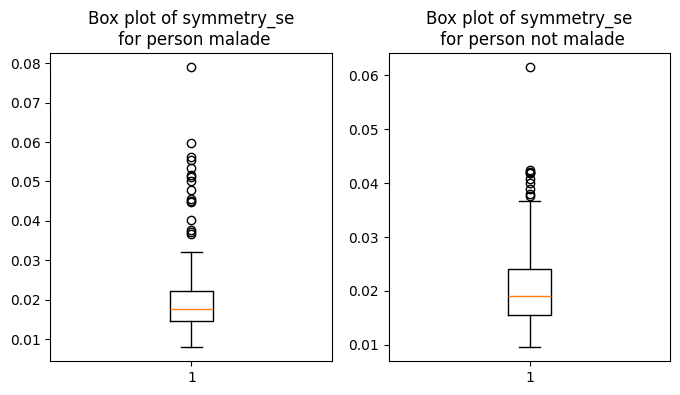

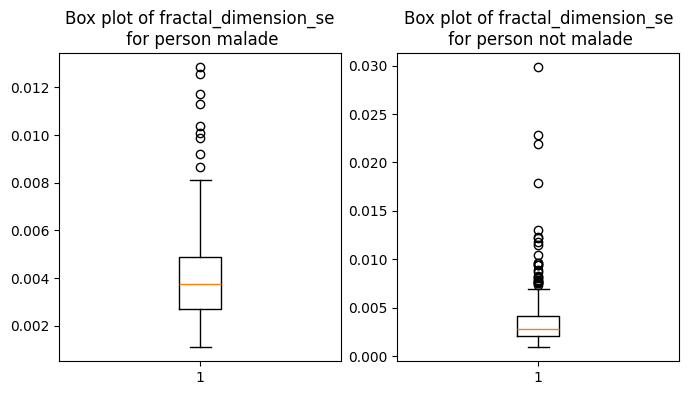

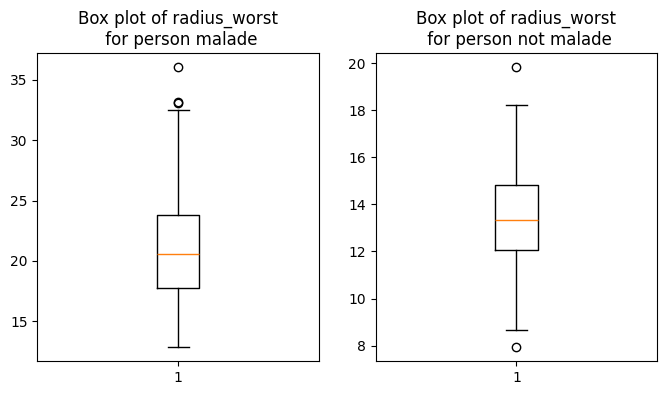

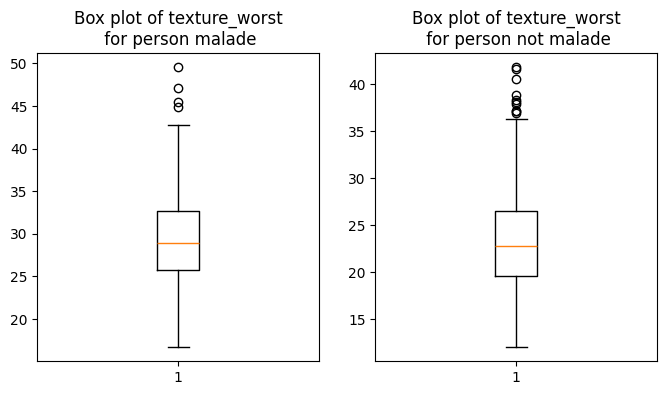

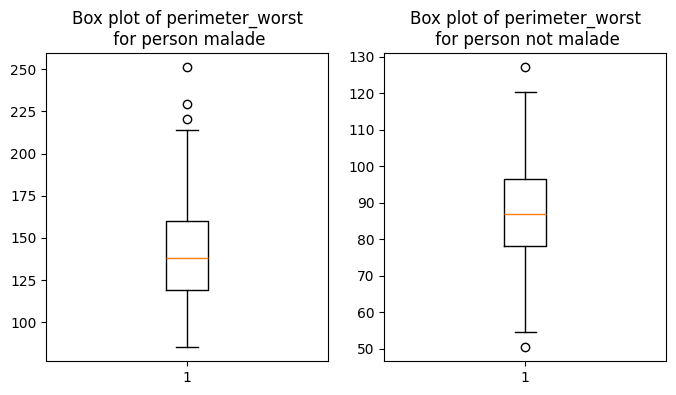

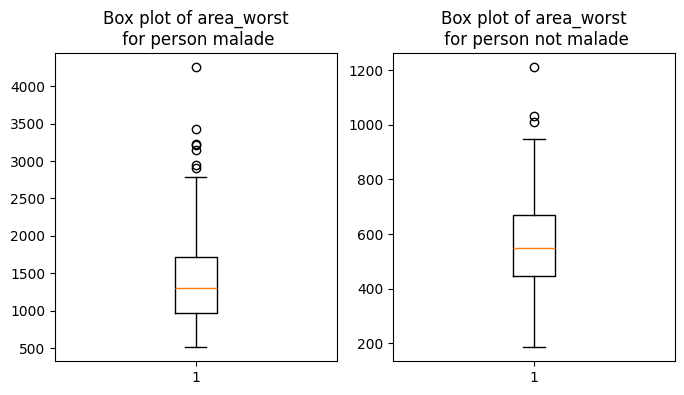

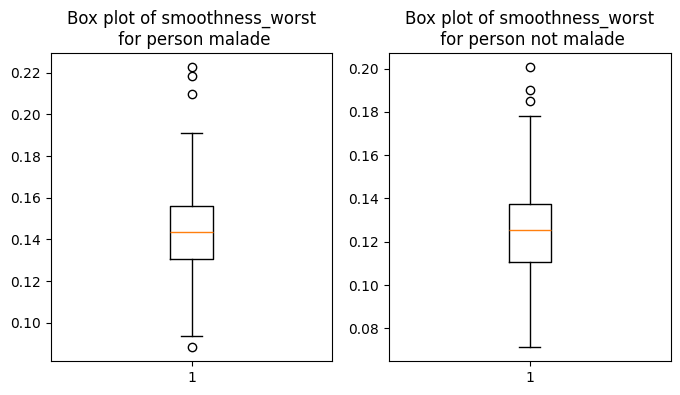

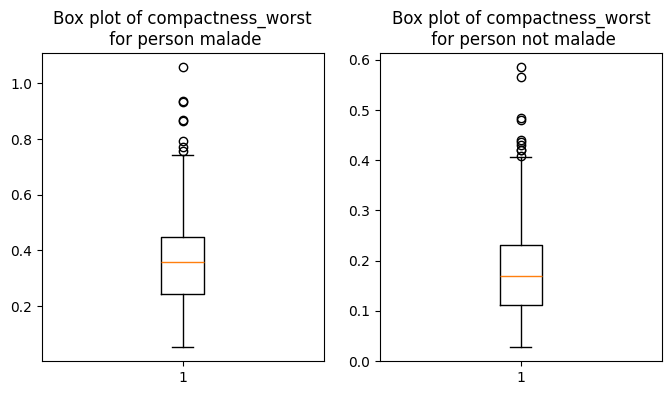

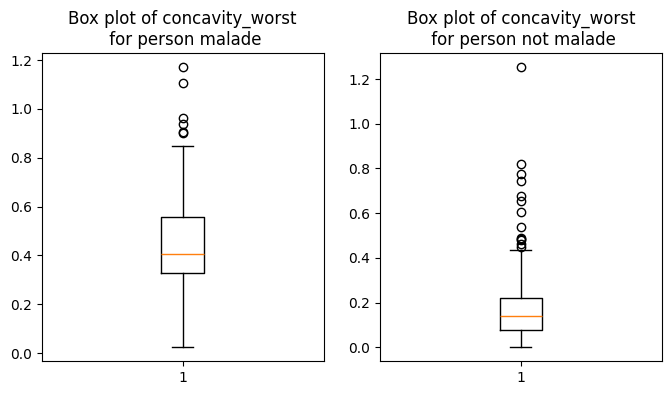

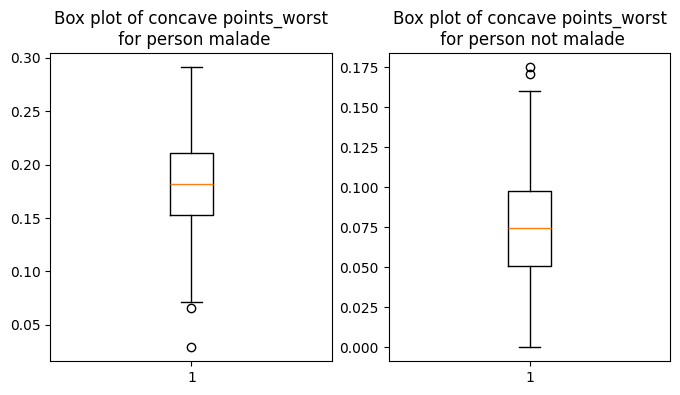

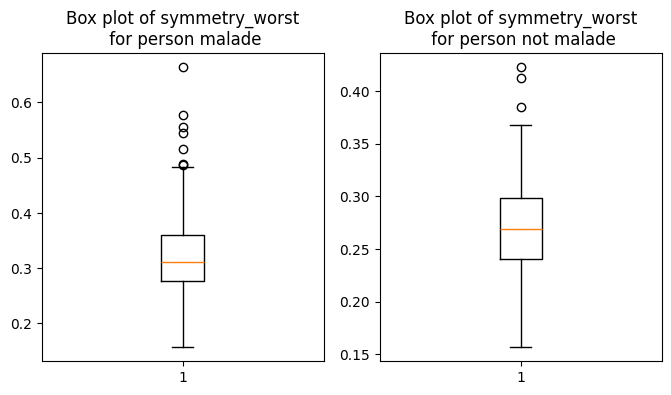

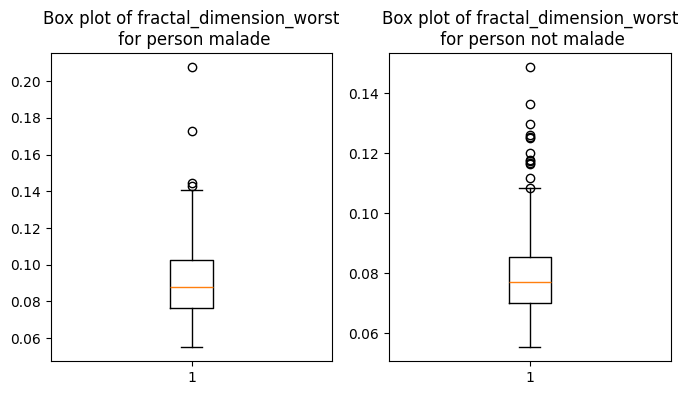

In [14]:
print("Outliers")
def maladie_box(df):
    plt.rcParams.update({'figure.max_open_warning': 0})
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.diagnosis == 'M', col]
            temp0 = df.loc[df.diagnosis == 'B', col]  
            fig = plt.figure(figsize=(8,4))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.boxplot(temp1.to_numpy())
            ax1.set_title('Box plot of ' + col + '\n for person malade')
            ax0.boxplot(temp0.to_numpy())
            ax0.set_title('Box plot of ' + col + '\n for person not malade')
            fig.show()
    return 'Done'



maladie_box(data)

**Test de Tukey**

In [15]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

In [16]:
def afficher_infos_outliers(dataframe):
    print("Test de Tukey")

    columns_to_exclude= 'diagnosis'
    data_excluded = dataframe.drop(columns=columns_to_exclude)
    outlier_rows = set()  

    for column in data_excluded.columns:
        outliers = detect_outliers(data_excluded[column])
        outlier_rows.update(data_excluded.index[outliers])

    outlier_count = len(outlier_rows)
    total_rows = len(data_excluded)
    percentage_outliers = (outlier_count / total_rows) * 100

    print(f"Nombre distinct de lignes: {total_rows}")
    print(f"Nombre distinct de lignes contenant au moins un outlier : {outlier_count}")
    print(f"Pourcentage par rapport au nombre total de lignes : {percentage_outliers:.2f}%")

In [17]:
afficher_infos_outliers(data)

Test de Tukey
Nombre distinct de lignes: 569
Nombre distinct de lignes contenant au moins un outlier : 171
Pourcentage par rapport au nombre total de lignes : 30.05%


**Matrice de confusion**

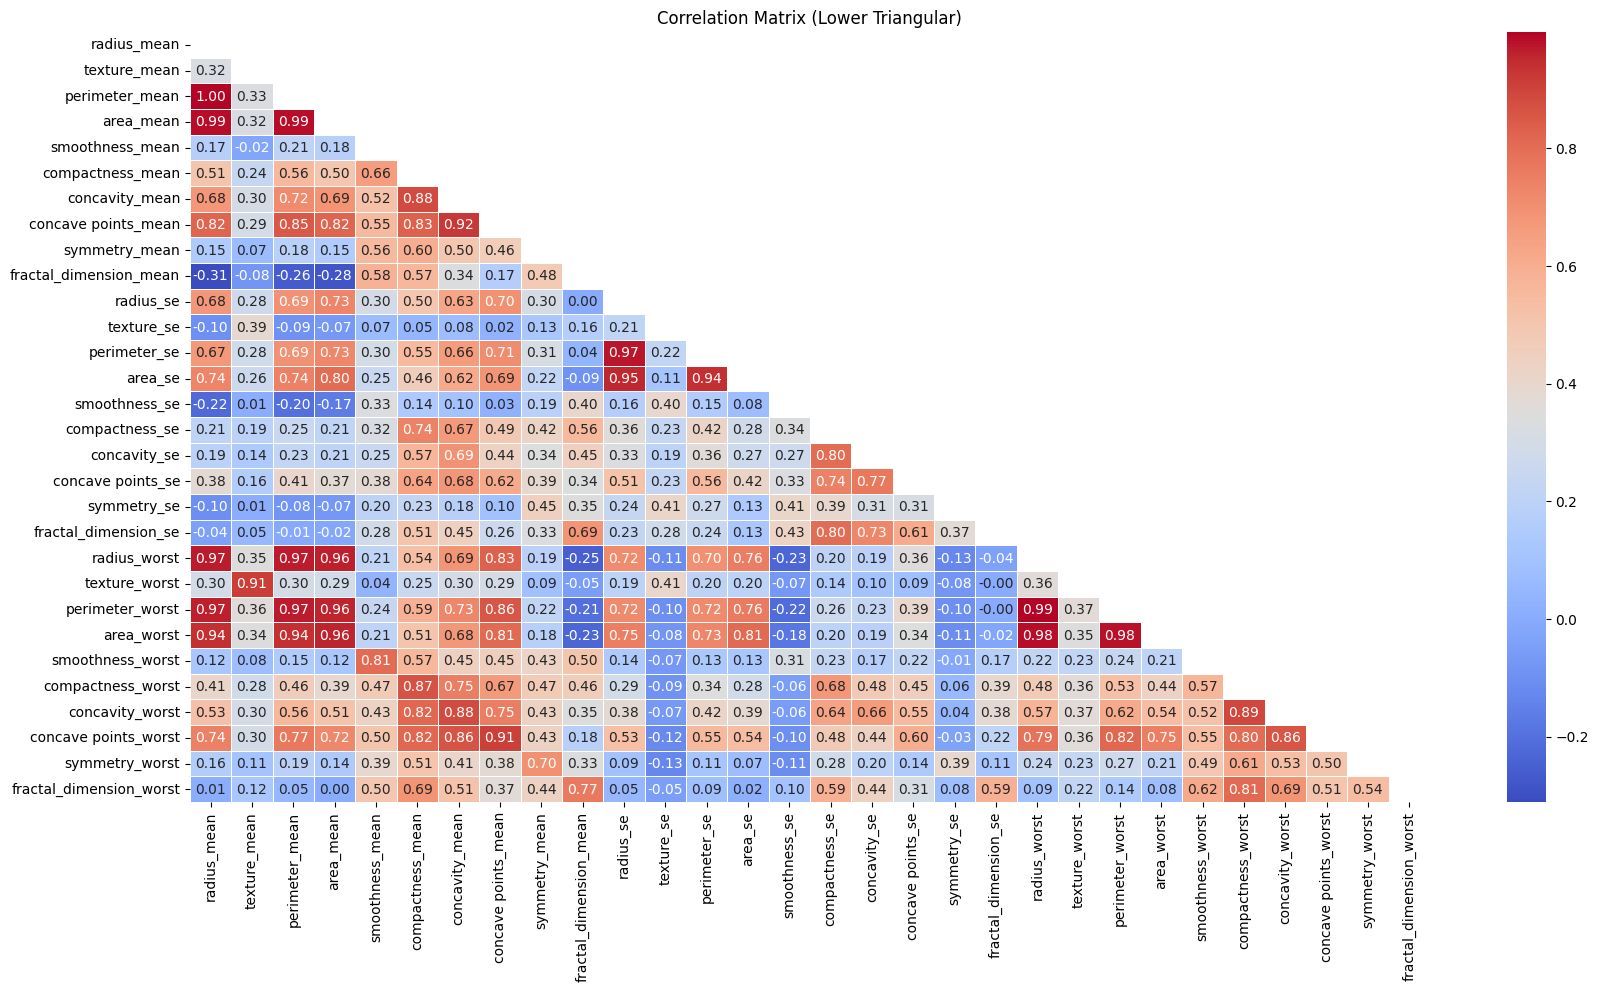

In [22]:
def afficher_matrice_correlation(dataframe):
    numeric_df = dataframe.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix (Lower Triangular)')
    plt.show()
afficher_matrice_correlation(data.drop('diagnosis', axis=1))

**Suppression des colonnes fortement correlées**

In [23]:
columns_to_drop = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'texture_worst', 
                   'radius_worst', 'area_se', 'area_worst', 'concave points_mean', 'smoothness_mean', 
                   'smoothness_worst', 'perimeter_se', 'compactness_mean', 'symmetry_worst', 
                   'compactness_se', 'fractal_dimension_mean', 'concavity_se', 'concave points_se', 
                   'fractal_dimension_se', 'perimeter_worst', 'compactness_worst', 'concavity_worst', 
                   'concavity_mean']

data = data.drop(columns=columns_to_drop, axis=1)


**Affichage des colonnes restantes**

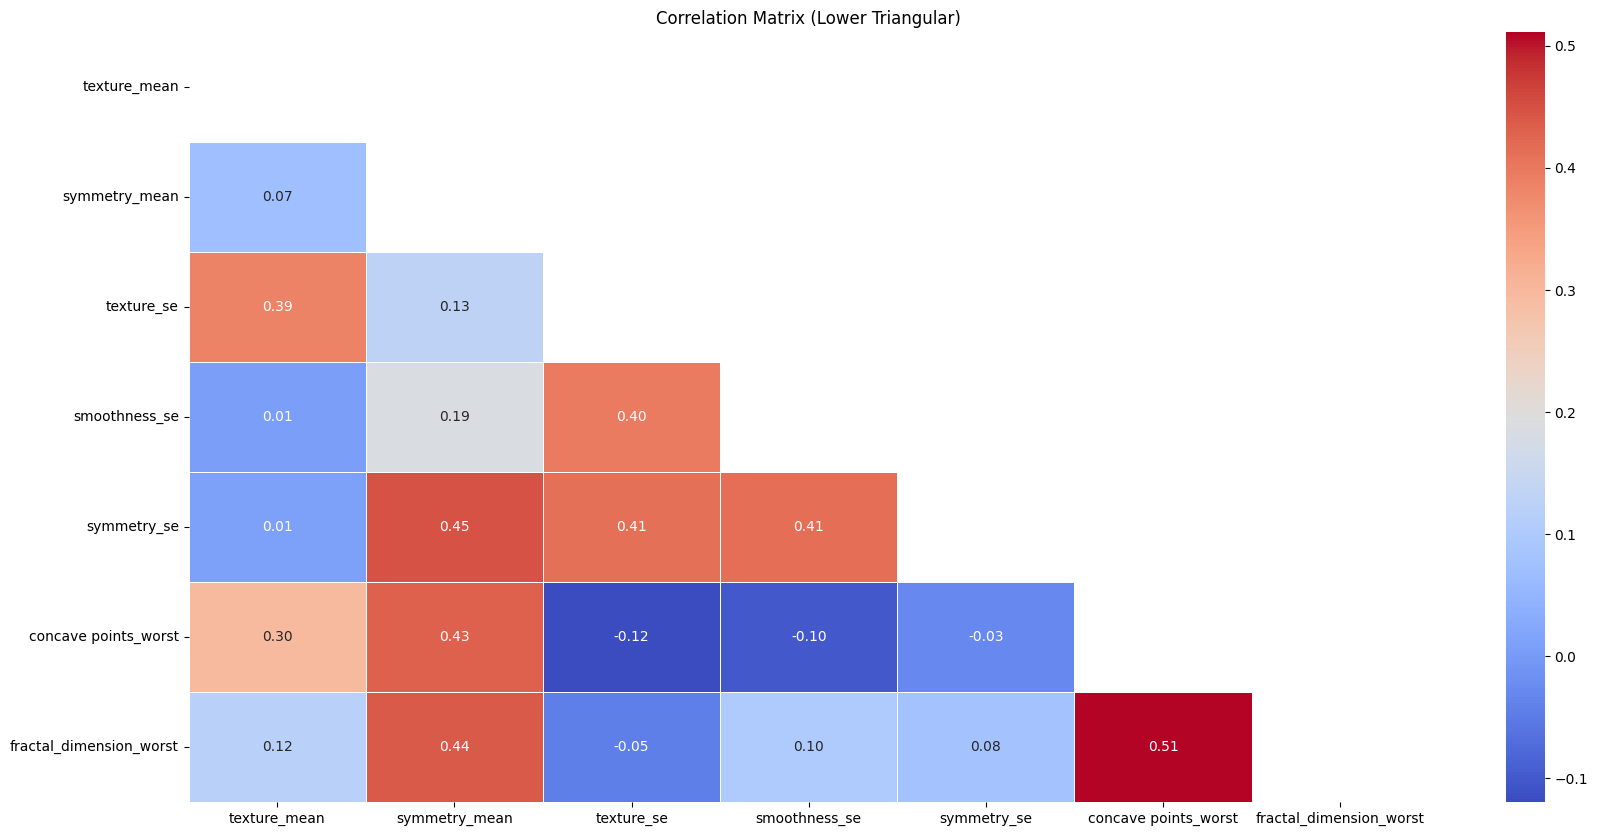

In [24]:
afficher_matrice_correlation(data)

**Pourcentage des outliers - Après suppression des colonnes corrélées**

In [25]:
afficher_infos_outliers(data)


Test de Tukey
Nombre distinct de lignes: 569
Nombre distinct de lignes contenant au moins un outlier : 93
Pourcentage par rapport au nombre total de lignes : 16.34%


In [26]:
data.head()

,diagnosis,texture_mean,symmetry_mean,texture_se,smoothness_se,symmetry_se,concave points_worst,fractal_dimension_worst
0,M,10.38,0.2419,0.9053,0.006399,0.03003,0.2654,0.11890
1,M,17.77,0.1812,0.7339,0.005225,0.01389,0.1860,0.08902
2,M,21.25,0.2069,0.7869,0.006150,0.02250,0.2430,0.08758
3,M,20.38,0.2597,1.1560,0.009110,0.05963,0.2575,0.17300
4,M,14.34,0.1809,0.7813,0.011490,0.01756,0.1625,0.07678


#  **5 - Feature engineering**

In [27]:
def maladie_bar(df):   
    plt.rcParams.update({'figure.max_open_warning': 0})
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.diagnosis == 'M', col].value_counts()
            temp0 = df.loc[df.diagnosis == 'B', col].value_counts() 
            fig = plt.figure(figsize=(8,4))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            temp1.plot(kind = 'bar', ax = ax1)
            ax1.set_title('Values of ' + col + '\n for person Malade')
            temp0.plot(kind = 'bar', ax = ax0)
            ax0.set_title('Values of ' + col + '\n for  person not Malade')
            fig.show()
    return 'Done'

/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/1818015100.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


'Done'

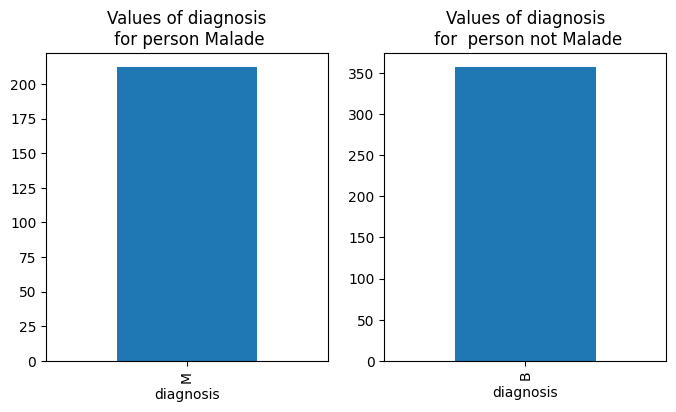

In [28]:
maladie_bar(data)

In [29]:

def maladies_hist(df):
    plt.rcParams.update({'figure.max_open_warning': 0})
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp1 = df.loc[df.diagnosis == 'M', col]
            temp0 = df.loc[df.diagnosis == 'B', col]  
            fig = plt.figure(figsize=(8,4))
            fig.clf()
            ax1 = fig.add_subplot(1, 2, 1)
            ax0 = fig.add_subplot(1, 2, 2) 
            ax1.hist(temp1.to_numpy(), bins = 30)
            ax1.set_title('Histogram of ' + col + '\n for for person malade')
            ax0.hist(temp0.to_numpy(), bins = 30)
            ax0.set_title('Histogram of ' + col + '\n for for person not malade')
            fig.show()
    return 'Done'

/var/folders/ms/kbs0kyfs5jl7czl1bj7bk37r0000gn/T/ipykernel_37600/4142013906.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


'Done'

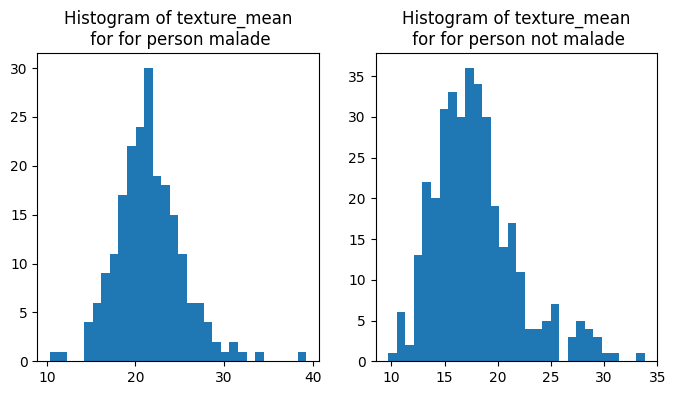

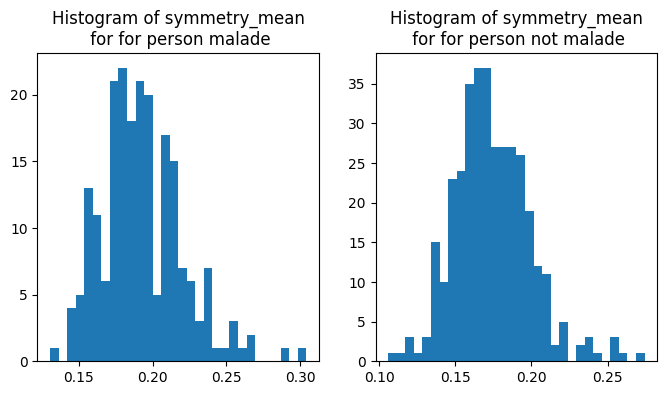

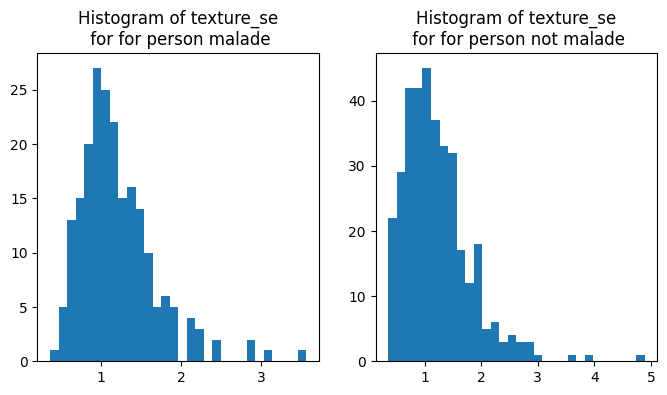

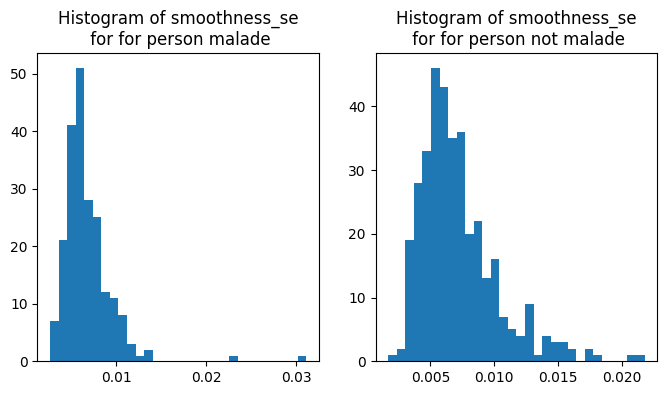

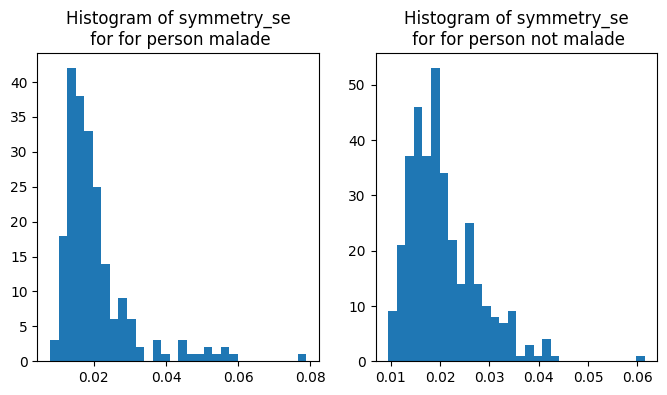

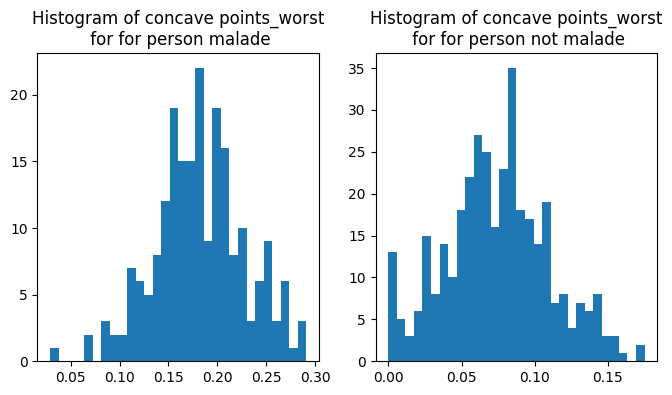

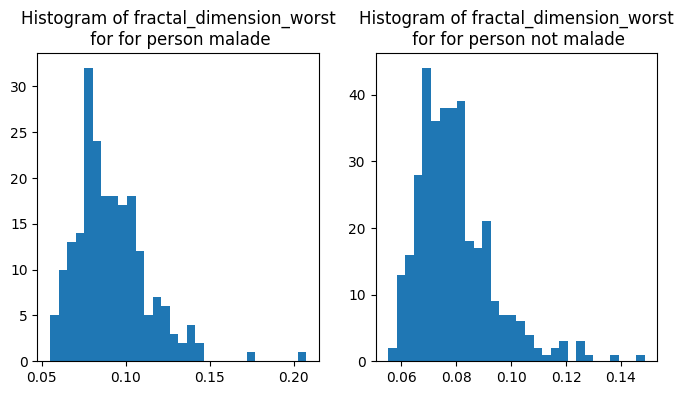

In [30]:
maladies_hist(data)

**Encodage des categories**

In [31]:
print(data['diagnosis'].dtype)
print(data['diagnosis'].unique())

object
['M' 'B']


In [32]:
def codage_categorie(df):
    le = preprocessing.LabelEncoder()
    for column_name in df.columns:
        if df[column_name].dtype == object:
            df[column_name] = le.fit_transform(df[column_name])
        else:
            pass
    return df
data = codage_categorie(data)

In [33]:
data.head()

,diagnosis,texture_mean,symmetry_mean,texture_se,smoothness_se,symmetry_se,concave points_worst,fractal_dimension_worst
0,1,10.38,0.2419,0.9053,0.006399,0.03003,0.2654,0.11890
1,1,17.77,0.1812,0.7339,0.005225,0.01389,0.1860,0.08902
2,1,21.25,0.2069,0.7869,0.006150,0.02250,0.2430,0.08758
3,1,20.38,0.2597,1.1560,0.009110,0.05963,0.2575,0.17300
4,1,14.34,0.1809,0.7813,0.011490,0.01756,0.1625,0.07678


# **6 - Sélection du modèle**

In [34]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

classifiers = {
    "SVM with Linear Kernel": SVC(),
    "Logistic": LogisticRegression(),    
}

best_f1_score = 0.0
best_classifier = None

for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)

    y_pred = classifier.predict(X_test_scaled)

    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score= accuracy_score(y_test,y_pred)

    print(f"Classifier: {classifier_name}, Precision: {precision}")
    print(f"Classifier: {classifier_name}, accuracy: {accuracy}")
    print(f"Classifier: {classifier_name}, recall: {recall}")
    print(f"Classifier: {classifier_name}, f1_score: {f1_score}\n")



Classifier: SVM with Linear Kernel, Precision: 0.8367346938775511
Classifier: SVM with Linear Kernel, accuracy: 0.9122807017543859
Classifier: SVM with Linear Kernel, recall: 0.9534883720930233
Classifier: SVM with Linear Kernel, f1_score: 0.9122807017543859

Classifier: Logistic, Precision: 0.8666666666666667
Classifier: Logistic, accuracy: 0.9122807017543859
Classifier: Logistic, recall: 0.9069767441860465
Classifier: Logistic, f1_score: 0.9122807017543859



**Choix du modèle retenu**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)


modelSVC=SVC()
modelSVC.fit(X_train_scaled, y_train)


X_test_scaled = scaler.transform(X_test)
y_pred = modelSVC.predict(X_test_scaled)


precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score= accuracy_score(y_test,y_pred)

print(f"Precision: {precision}")
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}\n")


params_used = modelSVC.get_params()

print("Paramètres utilisés dans le modèle:")
for param, value in params_used.items():
    print(f"{param}: {value}")

Precision: 0.8367346938775511
accuracy: 0.9122807017543859
recall: 0.9534883720930233
f1_score: 0.9122807017543859

Paramètres utilisés dans le modèle:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


**Affichage de matrice de confusion**

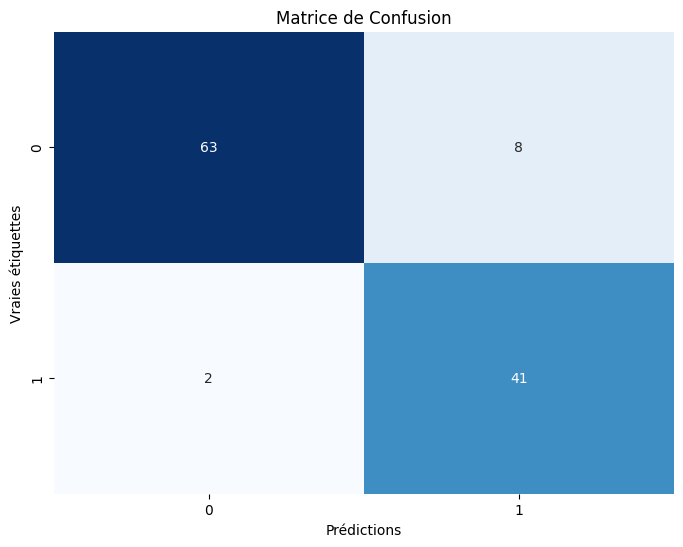

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

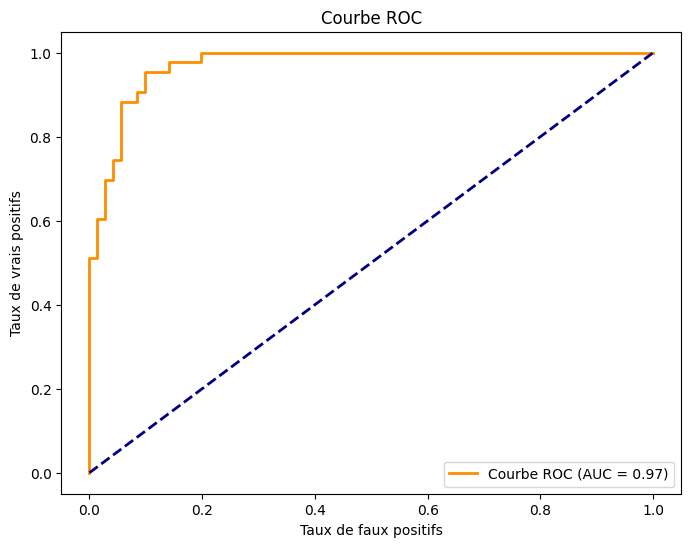

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, modelSVC.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [38]:
cv_scores = cross_val_score(modelSVC, X_train_scaled, y_train, cv=3, scoring='precision')

print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"Mean Cross-validation Precision Score: {mean_cv_score}")
print(f"Standard Deviation Cross-validation Precision Score: {std_cv_score}")

Cross-validation scores: [0.91071429 0.875      0.94545455]
Mean Cross-validation Precision Score: 0.9103896103896103
Standard Deviation Cross-validation Precision Score: 0.02876386395405981


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


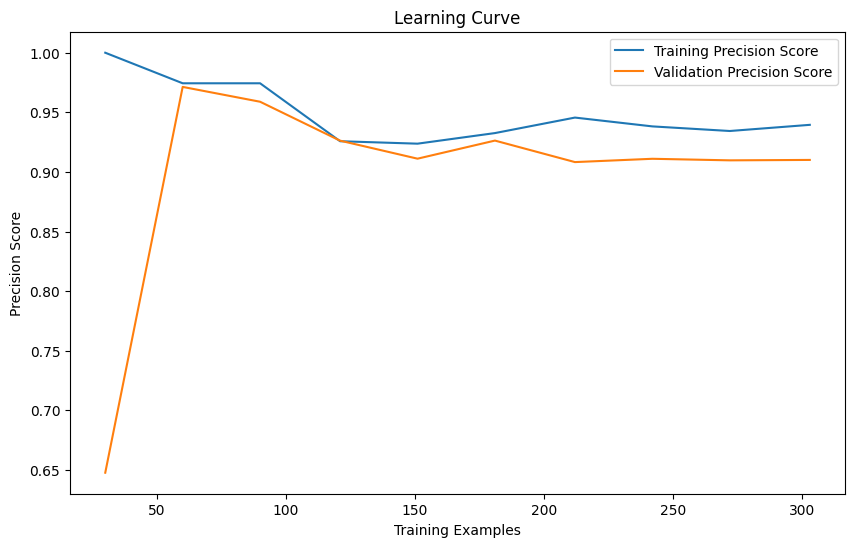

In [39]:
train_sizes, train_scores, test_scores = learning_curve(modelSVC, X_train_scaled, y_train, cv=3, scoring='precision', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Precision Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Precision Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Precision Score')
plt.legend()
plt.show()

# **7 - Tunning**

### **Amélioration par modification des paramètres de modèle**

In [40]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear'],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
grid_search = GridSearchCV(modelSVC, param_grid=param_grid, scoring='precision')
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres:", grid_search.best_params_)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision 

Meilleurs hyperparamètres: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [41]:
model2=SVC(C= 0.1, gamma=0.001, kernel= 'linear')
model2.fit(X_train_scaled, y_train)


X_test_scaled = scaler.transform(X_test)
y_pred = model2.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score= accuracy_score(y_test,y_pred)

print(f"Precision: {precision}")
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}\n") 


Precision: 0.9714285714285714
accuracy: 0.9122807017543859
recall: 0.7906976744186046
f1_score: 0.9122807017543859



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision 

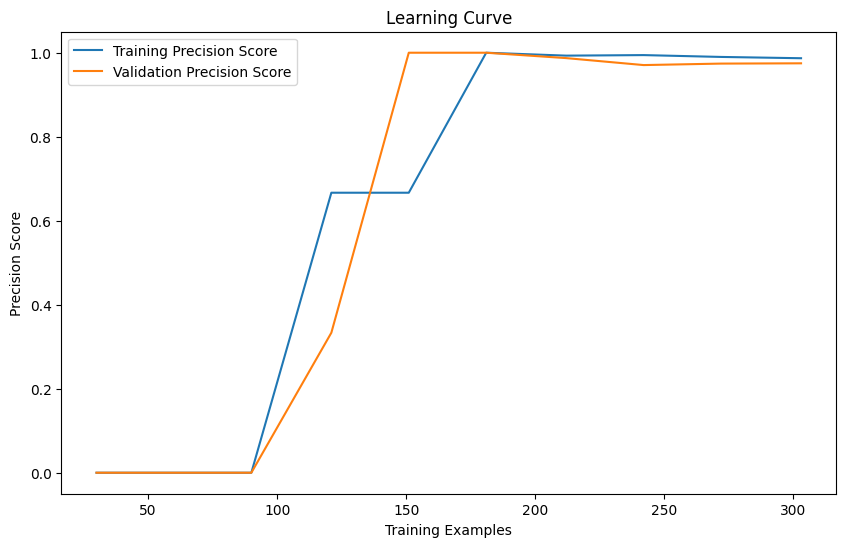

In [42]:
train_sizes, train_scores, test_scores = learning_curve(model2, X_train_scaled, y_train, cv=3, scoring='precision', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Precision Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Precision Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Precision Score')
plt.legend()
plt.show()

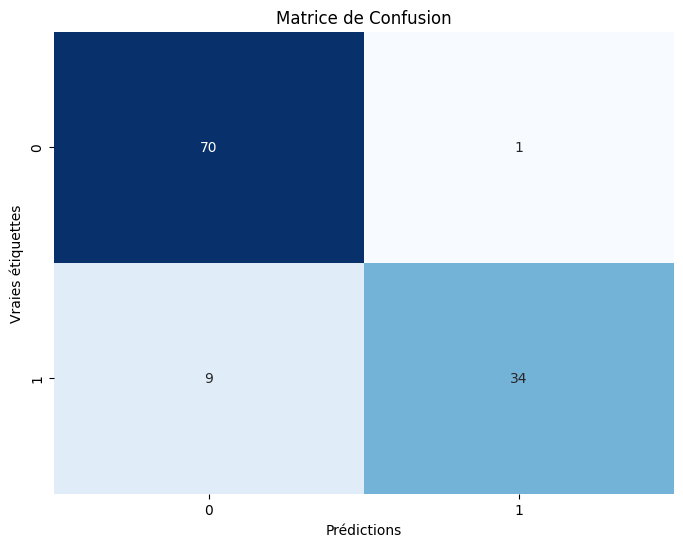

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

### **Amélioration de modèle - par sélecteur de features**

In [44]:
selector = SelectFromModel(model2, threshold='mean')
print(selector.fit_transform(X_train, y_train))
print(selector.get_support())
print(X_train.columns.to_numpy()[selector.get_support()])
print(selector.estimator_.coef_)

[[1.194    0.175   ]
 [0.7629   0.2903  ]
 [2.265    0.05087 ]
 [1.493    0.06136 ]
 [1.441    0.02579 ]
 [1.033    0.1712  ]
 [1.77     0.1021  ]
 [0.9938   0.08476 ]
 [0.9823   0.08211 ]
 [0.8737   0.1613  ]
 [1.502    0.1205  ]
 [1.361    0.228   ]
 [0.9489   0.2027  ]
 [1.35     0.0656  ]
 [0.6124   0.06987 ]
 [0.6062   0.1785  ]
 [0.9053   0.2654  ]
 [1.205    0.2356  ]
 [0.669    0.0753  ]
 [1.43     0.05741 ]
 [0.3628   0.1035  ]
 [0.7096   0.2393  ]
 [1.332    0.1453  ]
 [2.612    0.06736 ]
 [0.7372   0.1397  ]
 [0.6509   0.1838  ]
 [1.387    0.07431 ]
 [1.017    0.2388  ]
 [0.5477   0.06696 ]
 [0.469    0.05366 ]
 [0.9306   0.2051  ]
 [1.299    0.06608 ]
 [1.077    0.197   ]
 [1.48     0.192   ]
 [0.4956   0.1226  ]
 [0.4833   0.03312 ]
 [0.8339   0.153   ]
 [0.9078   0.04793 ]
 [0.9567   0.02564 ]
 [1.373    0.07911 ]
 [0.8927   0.02083 ]
 [1.545    0.291   ]
 [1.802    0.1564  ]
 [1.428    0.      ]
 [0.6683   0.07971 ]
 [0.9671   0.04044 ]
 [4.885    0.      ]
 [0.9429   0.

In [ ]:
new_Data = data[['diagnosis','texture_se', 'concave points_worst']]


In [ ]:
X1 = new_Data.drop('diagnosis', axis=1)
y1 = new_Data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

model2=SVC(C= 0.1, gamma=0.001, kernel= 'linear')
model2.fit(X_train_scaled, y_train)


X_test_scaled = scaler.transform(X_test)
y_pred = model2.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score= accuracy_score(y_test,y_pred)

print(f"Precision: {precision}")
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}\n") 

Precision: 0.9411764705882353
accuracy: 0.8859649122807017
recall: 0.7441860465116279
f1_score: 0.8859649122807017

